In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

import numpy as np

In [33]:
X, l = np.hsplit(np.loadtxt("./data/datasets/dataset_1.csv", skiprows=1, delimiter=","), [-1])

In [2]:
X, l = np.hsplit(np.loadtxt("./data/datasets/synthetic_2_2.csv", skiprows=1, delimiter=","), [-1])

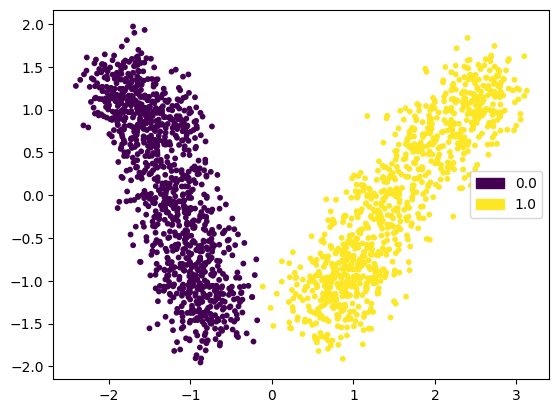

In [3]:
from clustpy.utils import plot_with_transformation

plot_with_transformation(X, l)

In [44]:
import cache_magic

import time
from collections import defaultdict
from data._metrics import METRICS
from data._utils import insert_dict


def calc():
    eval_results = defaultdict(list)

    for param_value in range(len(data)):
        for run in range(len(data[0])):
            X, l = data[param_value][run]
            for name, metric_fn in METRICS.items():
                start_time = time.time()
                start_process_time = time.process_time()
                eval_result = metric_fn(X, l)
                end_process_time = time.process_time()
                end_time = time.time()
                insert_dict(eval_results, {
                    "measure": name, 
                    "param_value": param_value, 
                    "run": run,
                    "eval_result": eval_result,
                    "time": end_time - start_time,
                    "process_time": end_process_time - start_process_time,
                })
    return eval_results

%cache eval_results_noise_dist = calc()

resetting cached values for eval_results_noise_dist
creating new value for variable 'eval_results_noise_dist'


In [49]:
import pandas as pd

SELECTED_MEASURES = [
    "DISCO",
    # "DC_DUNN",
    ### Competitors
    "DBCV",
    "DCSI",
    # "S_DBW",
    "CDBW",
    "CVDD",
    # "CVNN",
    "DSI",
    ### Gauss
    "SILHOUETTE",
    # "DUNN",
    # "DB",
    # "CH",
]

df = pd.DataFrame(data=eval_results_noise_dist)
df = df[df.measure.isin(SELECTED_MEASURES)]
df["measure"] = pd.Categorical(df["measure"], SELECTED_MEASURES)
df = df.sort_values("measure")
# df.groupby("measure").sum()

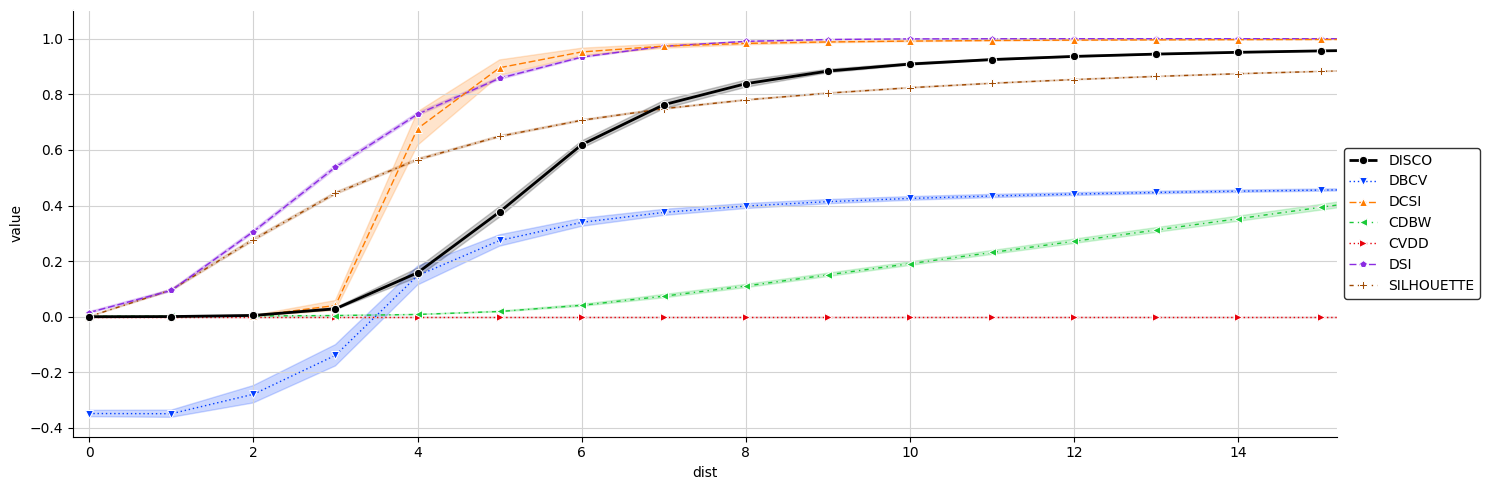

In [58]:
from data._utils import plot_lineplot

eps = 0.2
ymin = param_values[0] - eps
ymax = param_values[-1] + eps

remap = {
    "param_value": "dist",
    "eval_result": "value",
}

df = df.rename(remap, axis="columns")

plot_lineplot(
    df, remap["param_value"], remap["eval_result"], "measure", x_range=(ymin, ymax), y_range=(None, None)
)
plt.savefig("imgs/TwoBlobs_dist.png")